## 5)Modeling

In [ ]:
import xgboost

Xgboost results without prev_house_sales

In [ ]:
xgb = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = 1000)

xgb.fit(x_train, y_train)

preds = xgb.predict(x_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, preds))
print(rms)

271995.2298521062


Xgboost results with prev_house_sales

In [ ]:
from sklearn.model_selection import train_test_split
train_df = train.copy()
#drop columns that are address related
train_df = train_df.loc[:, ~train_df.columns.str.contains('^address')]
train_df = train_df.drop(['street', 'city', 'state', 'zip'], axis = 1)
#drop years (if calculated the age)
train_df = train_df.drop(['sale.priorSale.price', 'sale.lastSale.saleDate', 'sale.priorSale.saleDate', 'building.yearBuilt', 'sold_month',], axis = 1)
#split target
target = train_df.loc[:, 'sale.lastSale.price']
train_df = train_df.drop(['sale.lastSale.price'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit_transform the training and test data but keep the column names after
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=train_df.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=train_df.columns)

In [ ]:
#implement knn imputer
from sklearn.impute import KNNImputer
#get data frame of all columns excluding prev_sale_price
x_train_exc = x_train.loc[:, ~x_train.columns.str.contains('prev_sale_price')]
x_test_exc = x_test.loc[:, ~x_test.columns.str.contains('prev_sale_price')]

imputer = KNNImputer(n_neighbors=5)
imputer.fit(x_train_exc)
x_train_exc = pd.DataFrame(imputer.transform(x_train_exc), columns=x_train_exc.columns)
x_test_exc = pd.DataFrame(imputer.transform(x_test_exc), columns=x_test_exc.columns)

#add the prev_sale column back in
x_train_exc['prev_sale_price'] = x_train['prev_sale_price']
x_test_exc['prev_sale_price'] = x_test['prev_sale_price']

x_train = x_train_exc
x_test = x_test_exc

In [ ]:
#print out the columns that have null values
x_train.isnull().sum()[x_train.isnull().sum() > 0]

prev_sale_price    1646
dtype: int64

In [ ]:
xgb = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = 1000)

xgb.fit(x_train, y_train)

preds = xgb.predict(x_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, preds))
print(rms)

200902.0531565715


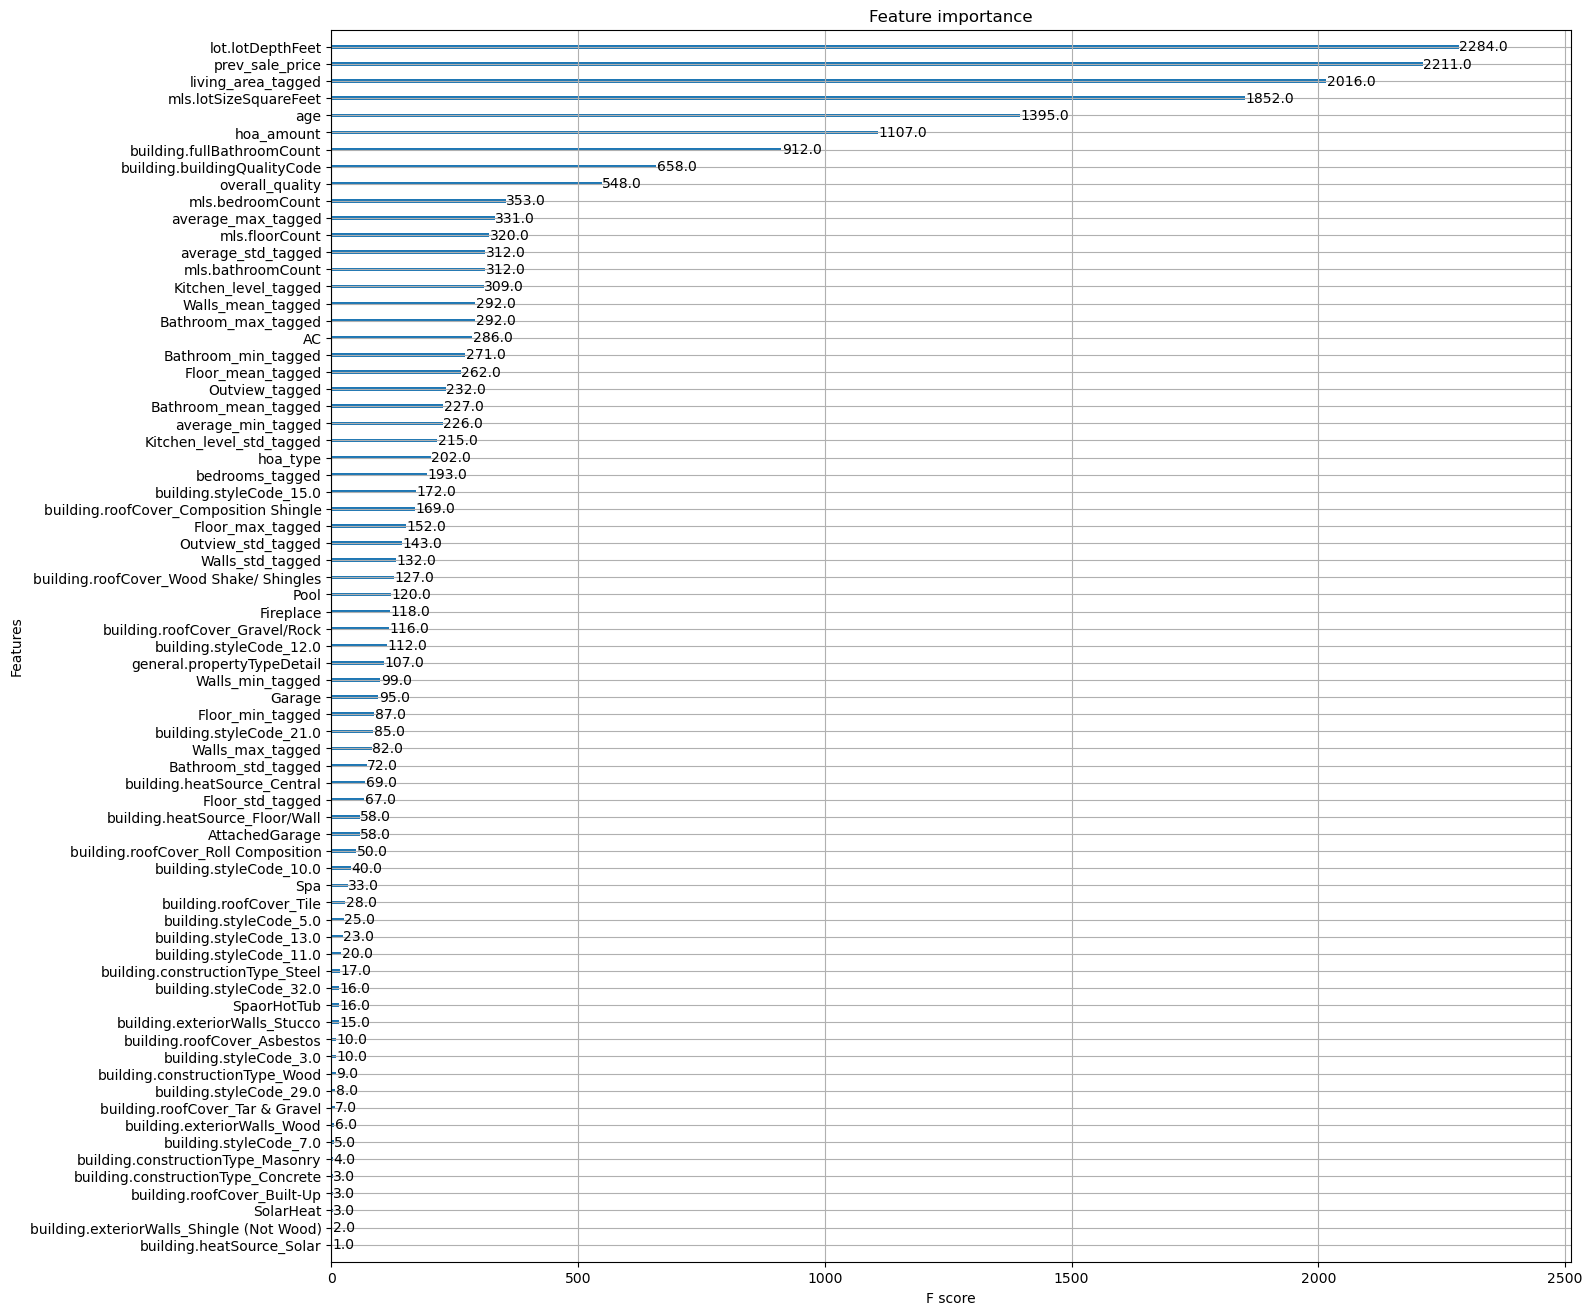

In [ ]:
#plot feature importance
xgboost.plot_importance(xgb)
plt.rcParams['figure.figsize'] = [16, 16]
plt.show()


TODO: Need to group unique houses into same train and test splits. Otherwise, risk overfitting